Epoch 1/11
938/938 [==============================] - 22s 23ms/step - loss: 0.1773 - accuracy: 0.9437 - val_loss: 0.0502 - val_accuracy: 0.9844
Epoch 2/11
938/938 [==============================] - 21s 23ms/step - loss: 0.0464 - accuracy: 0.9860 - val_loss: 0.0320 - val_accuracy: 0.9898
Epoch 3/11
938/938 [==============================] - 21s 22ms/step - loss: 0.0342 - accuracy: 0.9892 - val_loss: 0.0331 - val_accuracy: 0.9890
Epoch 4/11
938/938 [==============================] - 21s 23ms/step - loss: 0.0263 - accuracy: 0.9919 - val_loss: 0.0323 - val_accuracy: 0.9905
Epoch 5/11
938/938 [==============================] - 22s 23ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0305 - val_accuracy: 0.9897
Epoch 6/11
938/938 [==============================] - 21s 22ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0272 - val_accuracy: 0.9911
Epoch 7/11
938/938 [==============================] - 21s 23ms/step - loss: 0.0154 - accuracy: 0.9953 - val_loss: 0.0316 - val_accuracy:

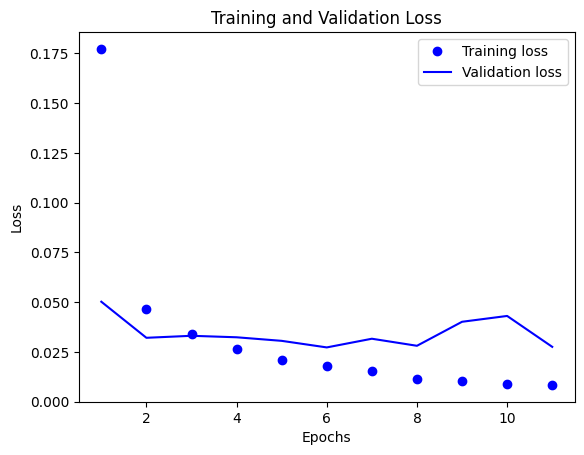

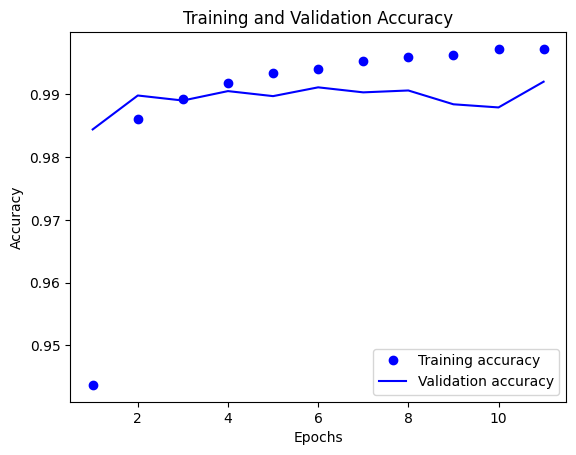

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

# Load and preprocess the MNIST dataset
train_data = pd.read_csv('LP-IV-datasets/MNIST(Ass2&3)/mnist_train.csv')
test_data = pd.read_csv('LP-IV-datasets/MNIST(Ass2&3)/mnist_test.csv')

train_images = train_data.drop('label', axis=1).values
train_labels = train_data['label'].values

test_images = test_data.drop('label', axis=1).values
test_labels = test_data['label'].values

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Build a CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=11, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the network
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

# Plot the training loss and accuracy
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
